<a href="https://colab.research.google.com/github/chandrasekhar36/FER-for-E-Environment/blob/master/python/DAiSEE_train_model_AL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from matplotlib import pyplot
from math import sqrt 
import numpy as np 
import scipy.misc 
from IPython.display import display 
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator 
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization,GlobalAveragePooling2D
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate
from keras.optimizers import Adam, SGD
from keras.regularizers import l1, l2
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.utils import shuffle
%matplotlib inline
data=pd.read_pickle('/content/FER-for-E-Environment/res/Images_data.pkl')
data=shuffle(data)
data.head()

Using TensorFlow backend.


,emotion,pixels,usage
1496,1,191 191 170 149 150 158 166 156 157 142 147 17...,train
1277,1,21 42 64 85 111 135 159 151 92 57 45 38 36 38 ...,train
2855,2,42 28 35 71 93 101 56 23 26 57 63 80 88 97 98 ...,train
1664,1,28 35 78 120 143 146 138 130 117 113 132 142 1...,train
1607,1,227 113 21 57 84 92 103 97 92 99 90 76 68 66 6...,train


In [ ]:
num_classes = 4
emotion_labels = ['Boredm','Confusion','Engagement','Frustration']
classes=np.array(('Boredm','Confusion','Engagement','Frustration'))

In [ ]:
print(data.usage.value_counts() )
data.emotion.value_counts()

train    3047
test      760
Name: usage, dtype: int64


1    1372
0     985
2     873
3     577
Name: emotion, dtype: int64

In [ ]:
train_set = data[(data.usage == 'train')] 
train_set=shuffle(train_set)
val_set = data[(data.usage == 'test')]
val_set=shuffle(val_set)
X_train = np.array(list(map(str.split, train_set.pixels)), np.float32) 
X_val = np.array(list(map(str.split, val_set.pixels)), np.float32) 
X_train = X_train.reshape(X_train.shape[0], 48,48, 1) 
X_val = X_val.reshape(X_val.shape[0], 48,48, 1)

In [ ]:
num_train = X_train.shape[0]
num_val = X_val.shape[0]

In [ ]:
print(num_classes,num_train,num_val)

4 3047 760


In [ ]:
y_train = train_set.emotion 
y_train = np_utils.to_categorical(y_train, num_classes) 
y_val = val_set.emotion 
y_val = np_utils.to_categorical(y_val, num_classes) 

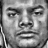

[0. 1. 0. 0.]


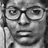

[0. 0. 1. 0.]


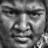

[0. 1. 0. 0.]


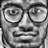

[0. 0. 1. 0.]


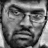

[0. 1. 0. 0.]


In [ ]:
import random
from google.colab.patches import cv2_imshow
for i in range(5):
  m=random.randrange(760)
  k=X_val[m] 
  k=k.reshape((48,48,1))
  cv2_imshow(k)
  print(y_val[m])

In [ ]:
from keras.models import Sequential
from keras import layers
from keras import models
from keras import optimizers
from keras import layers
from keras import models
from keras import optimizers
width=48
height=48
model = Sequential()
num_features=32
model.add(Conv2D(num_features, kernel_size=(3, 3), activation='relu', input_shape=(width, height, 1), data_format='channels_last', kernel_regularizer=l2(0.01)))
model.add(Conv2D(num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))


model.add(Conv2D(2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))




model.add(Flatten())
model.add(Dense(2*2*num_features, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2*num_features, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(num_classes, activation='softmax'))
 


    

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 46, 46, 32)        320       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 46, 46, 32)        9248      
_________________________________________________________________
batch_normalization_6 (Batch (None, 46, 46, 32)        128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 23, 23, 64)        18496     
_________________________________________________________________
batch_normalization_7 (Batch (None, 23, 23, 64)        256       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 23, 23, 64)       

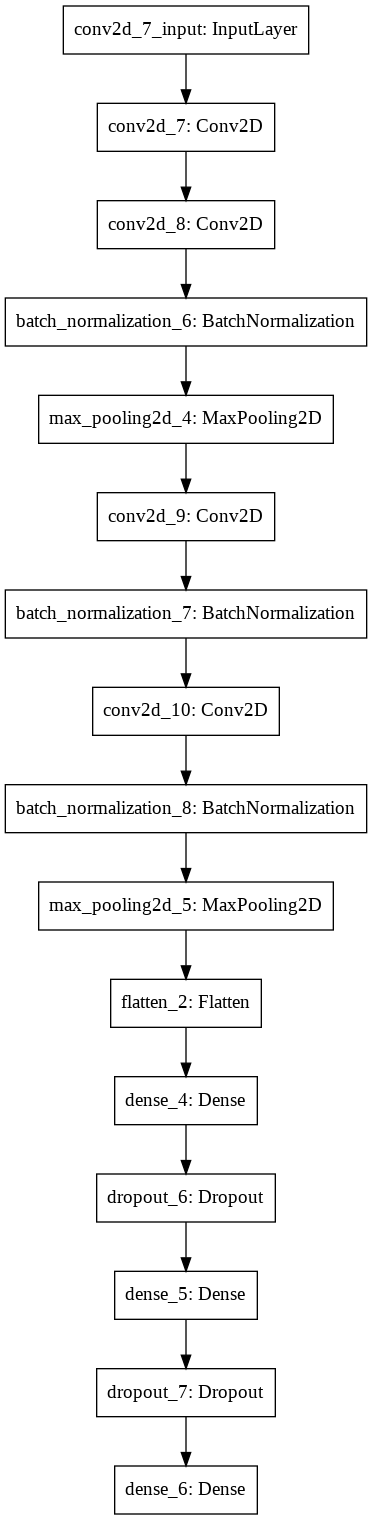

In [ ]:
# optimizer:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
plot_model(
    model, to_file='../model_architecture.png', show_shapes=False, show_layer_names=True,
    rankdir='TB', expand_nested=True, dpi=96
)

In [ ]:
#fit
nb_epoch =100
batch_size = 64
history = model.fit(X_train, y_train,epochs=nb_epoch,
          validation_data=(X_val,y_val), shuffle=True, verbose=1)

Train on 3047 samples, validate on 760 samples
Epoch 1/100
3047/3047 [==============================] - 39s 13ms/step - loss: 1.5881 - accuracy: 0.3177 - val_loss: 1.3811 - val_accuracy: 0.3645
Epoch 2/100
3047/3047 [==============================] - 38s 12ms/step - loss: 1.3177 - accuracy: 0.3978 - val_loss: 1.2948 - val_accuracy: 0.3987
Epoch 3/100
3047/3047 [==============================] - 38s 13ms/step - loss: 1.2406 - accuracy: 0.4368 - val_loss: 1.2945 - val_accuracy: 0.4039
Epoch 4/100
3047/3047 [==============================] - 38s 13ms/step - loss: 1.1738 - accuracy: 0.4759 - val_loss: 1.2202 - val_accuracy: 0.4684
Epoch 5/100
3047/3047 [==============================] - 38s 13ms/step - loss: 1.0960 - accuracy: 0.5159 - val_loss: 1.1556 - val_accuracy: 0.5066
Epoch 6/100
3047/3047 [==============================] - 38s 13ms/step - loss: 1.0329 - accuracy: 0.5474 - val_loss: 1.2429 - val_accuracy: 0.4632
Epoch 7/100
3047/3047 [==============================] - 38s 13ms/step 

In [ ]:
model_1=Model(inputs=model.input,outputs=model.layers[-6].output)

In [ ]:
from sklearn.svm import SVC
clf = SVC(kernel='linear', verbose=True,probability=True, tol=1e-3)

In [ ]:
val_labs=np.asarray([np.argmax(i) for i in y_val])
train_labs=np.asarray([np.argmax(i) for i in y_train])

In [ ]:
def plot_confusion_matrix(y_test, y_pred, classes,
                          normalize=False,
                          title='Unnormalized confusion matrix',
                          cmap=plt.cm.Blues):
    cm = confusion_matrix(y_test, y_pred)
    
    if normalize:
        cm = np.round(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], 2)
        
    np.set_printoptions(precision=2)
        
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.min() + (cm.max() - cm.min()) / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True expression')
    plt.xlabel('Predicted expression')

    plt.show()

In [ ]:
import dlib
import math
predictor = dlib.shape_predictor("/content/drive/My Drive/Project/data/shape_predictor_68_face_landmarks.dat")
def get_landmarks(image):
    dlibRect =[dlib.rectangle(0, 48, 48, 0)] 
    for d in dlibRect: #For all detected face instances individually
        shape = predictor(image, d) #Draw Facial Landmarks with the predictor class
        xlist = []
        ylist = []
        for i in range(1,68): #Store X and Y coordinates in two lists
            xlist.append(float(shape.part(i).x))
            ylist.append(float(shape.part(i).y))
        xmean = np.mean(xlist)
        ymean = np.mean(ylist)
        xcentral = [(x-xmean) for x in xlist]
        ycentral = [(y-ymean) for y in ylist]
        landmarks_vectorised = []
        for x, y, w, z in zip(xcentral, ycentral, xlist, ylist):
            landmarks_vectorised.append(w)
            landmarks_vectorised.append(z)
            meannp = np.asarray((ymean,xmean))
            coornp = np.asarray((z,w))
            dist = np.linalg.norm(coornp-meannp)
            landmarks_vectorised.append(dist)
            landmarks_vectorised.append((math.atan2(y, x)*360)/(2*math.pi))
        return np.asarray(landmarks_vectorised)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
def get_hand_features(data):
  print("getting Handcrafted Features.............")
  l=[]
  for i in data:
    z=i.reshape(48,48)
    z=z.astype('uint8')
    l.append(get_landmarks(z))
  return np.asarray(l)

In [ ]:
def append_CNN_hand(cnn_features,hand_features):
  print("Merging Both Fearures.............")
  if cnn_features.shape[0]!=hand_features.shape[0]:
    return 'shape not equal'
  else:
    l=[]
    for i in range(cnn_features.shape[0]):
      k=np.append(cnn_features[i],hand_features[i])
      l.append(k)
    return np.asarray(l) 

In [ ]:
def get_hybrid_features(train_data,val_data,CNN_model):
  data={"Trainging Data":train_data,"Validation Data":val_data}
  li=[]
  for iii in data.keys():
    print("working on ",iii)
    print("getting CNN Features.....")
    extracted_features=CNN_model.predict(data[iii])
    hand_features=get_hand_features(data[iii])
    x=append_CNN_hand(extracted_features,hand_features)
    if x=="shape not equal":
      print("Error")
      return -1,-1
    else:
      li.append(x)
  return li

In [ ]:
model_1.save('/content/drive/My Drive/Project/data/Model_for_daisee_less_arch_FC.hdf5')

working on  Trainging Data
getting CNN Features.....
getting Handcrafted Features.............
Merging Both Fearures.............


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  # Remove the CWD from sys.path while we load stuff.


working on  Validation Data
getting CNN Features.....
getting Handcrafted Features.............
Merging Both Fearures.............
Feature Merging Completed!!!!!
Training the classifier........
[LibSVM]time taken:  867.4779057502747


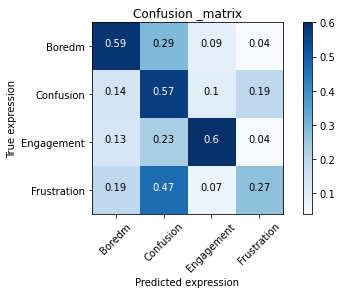

obtained_accuracy:  0.5342105263157895


In [ ]:
#hybrid Model
import time
train_merged,val_merged=get_hybrid_features(X_train,X_val,model_1)
print("Feature Merging Completed!!!!!","Training the classifier........",sep='\n')
for i in range(1):
  s=time.time()
  clf.fit(train_merged,train_labs)
  print('time taken: ',time.time()-s)
  pred_lin = clf.score(val_merged,val_labs)
  plot_confusion_matrix(val_labs,clf.predict(val_merged),classes,normalize=True,title="Confusion _matrix")
  print('obtained_accuracy: ',pred_lin)

Training the classifier........
[LibSVM]time taken:  806.2664928436279


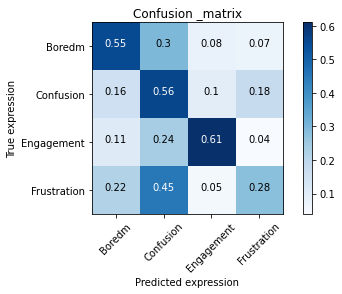

obtained_accuracy:  0.5263157894736842


In [ ]:
#only CNN
print("Training the classifier........")
for i in range(1):
  s=time.time()
  train_data=model_1.predict(X_train)
  val_data=model_1.predict(X_val)
  clf.fit(train_data,train_labs)
  print('time taken: ',time.time()-s)
  pred_lin = clf.score(val_data,val_labs)
  plot_confusion_matrix(val_labs,clf.predict(val_data),classes,normalize=True,title="Confusion _matrix")
  print('obtained_accuracy: ',pred_lin)

Training the classifier........
getting Handcrafted Features.............
getting Handcrafted Features.............
[LibSVM]time taken:  12710.925630807877


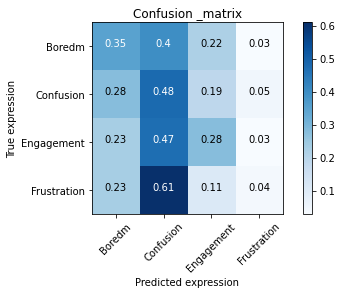

obtained_accuracy:  0.33157894736842103


In [ ]:
#only Handy
print("Training the classifier........")
for i in range(1):
  s=time.time()
  train_data=get_hand_features(X_train)                                                         
  val_data=get_hand_features(X_val)
  clf.fit(train_data,train_labs)
  print('time taken: ',time.time()-s)
  pred_lin = clf.score(val_data,val_labs)
  plot_confusion_matrix(val_labs,clf.predict(val_data),classes,normalize=True,title="Confusion _matrix")
  print('obtained_accuracy: ',pred_lin)

In [ ]:
model_1.save('../res/FER_Model.hdf5') #saving the model to extract features

In [ ]:
from sklearn.externals import joblib
joblib.dump(clf,'../res/classifier_svm.pkl')    #saving the classifier

['/content/drive/My Drive/project/classifier_svm.pkl']

<Figure size 432x288 with 0 Axes>

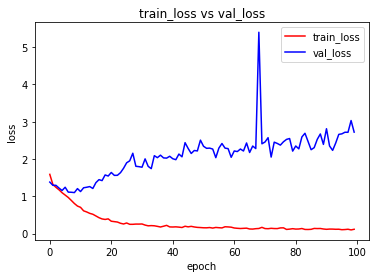

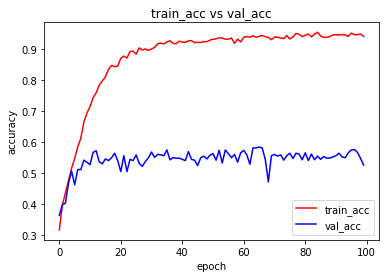

<Figure size 432x288 with 0 Axes>

In [ ]:
# visualizing losses and accuracy
%matplotlib inline
train_loss=history.history['loss']
val_loss=history.history['val_loss']
train_acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

epochs = range(len(train_acc))

plt.plot(epochs,train_loss,'r', label='train_loss')
plt.plot(epochs,val_loss,'b', label='val_loss')
plt.title('train_loss vs val_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.figure()

plt.plot(epochs,train_acc,'r', label='train_acc')
plt.plot(epochs,val_acc,'b', label='val_acc')
plt.title('train_acc vs val_acc')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.figure()

In [ ]:
loss = model.evaluate(X_val/255., y_val) 
print("Test Loss " + str(loss[0]))
print("Test Acc: " + str(loss[1]))

760/760 [==============================] - 2s 3ms/step
Test Loss 5.277735313616301
Test Acc: 0.36052632331848145


In [ ]:
loss = model.evaluate(X_train/255., y_train) 
print("Train Loss " + str(loss[0]))
print("Train Acc: " + str(loss[1]))

3047/3047 [==============================] - 10s 3ms/step
Train Loss 5.283925234704163
Train Acc: 0.3603544533252716


In [ ]:
z=model.predict(X_train)
y=[]
for i in z:
  y.append(np.argmax(i))
y=np.asarray(y)

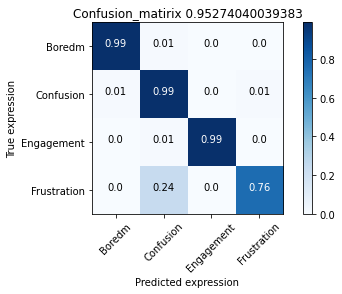

In [ ]:
plot_confusion_matrix(train_labs,y,classes,normalize=True,title='Confusion_matirix '+str(list(train_labs==y).count(True)/len(train_labs)))

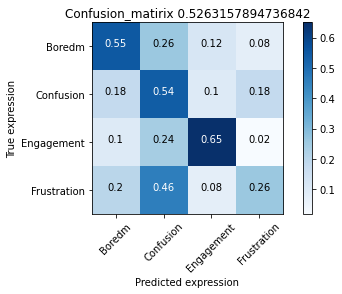

In [ ]:
plot_confusion_matrix(val_labs,y,classes,normalize=True,title='Confusion_matirix '+str(list(val_labs==y).count(True)/len(val_labs)))

In [ ]:
len(list(val_labs==y))

760